### Question 3
Create some fake data to do some experiments on the runtime complexity of your decision tree algorithm. Create a dataset with N samples and M binary features. Vary M and N to plot the time taken for: 1) learning the tree, 2) predicting for test data. How do these results compare with theoretical time complexity for decision tree creation and prediction. You should do the comparison for all the four cases of decision trees. **[1 marks]**	

Case 1: Discrete input discrete output
###########################


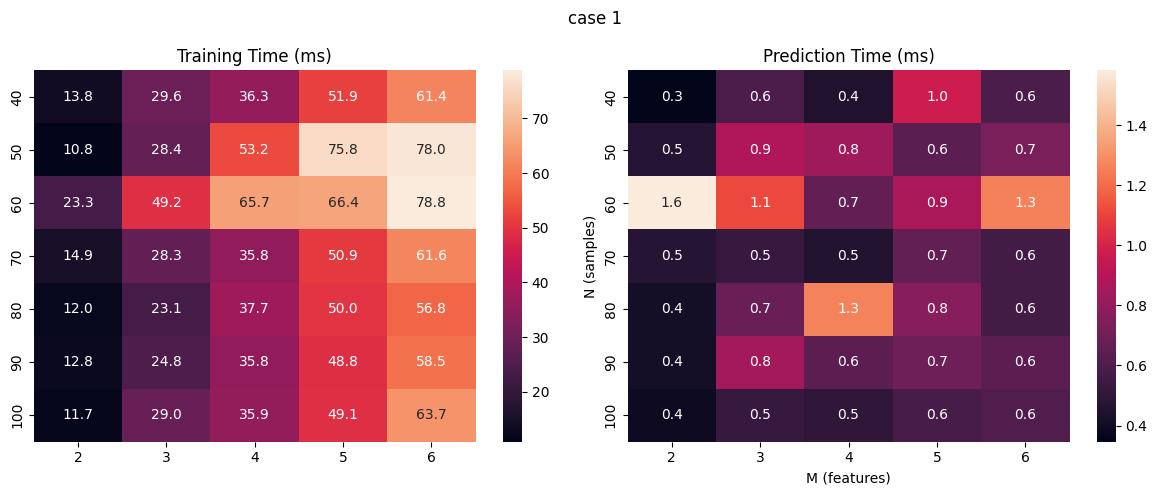

Case 2: Discrete input continuous output
###########################


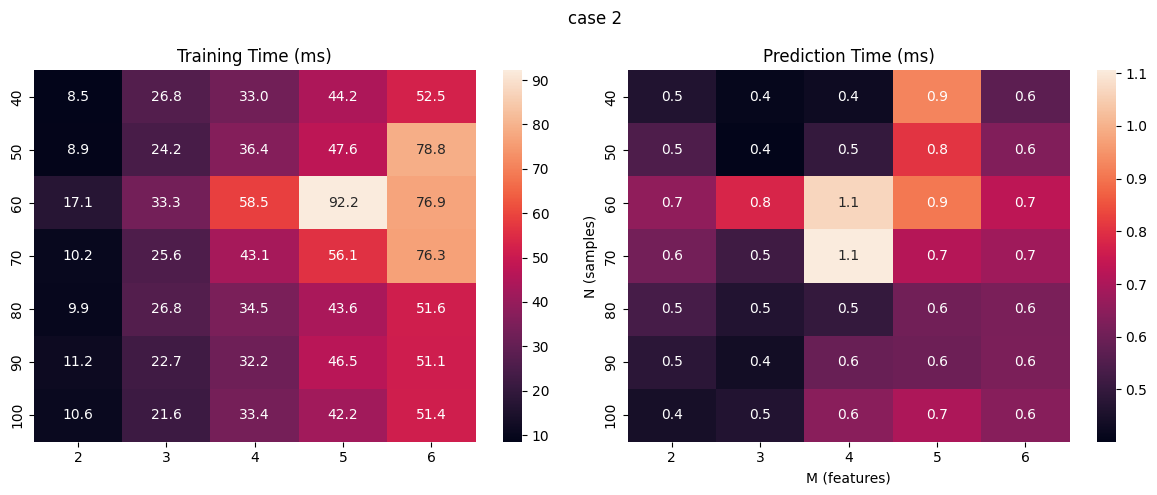

Case 3: Continuous input discrete output
###########################


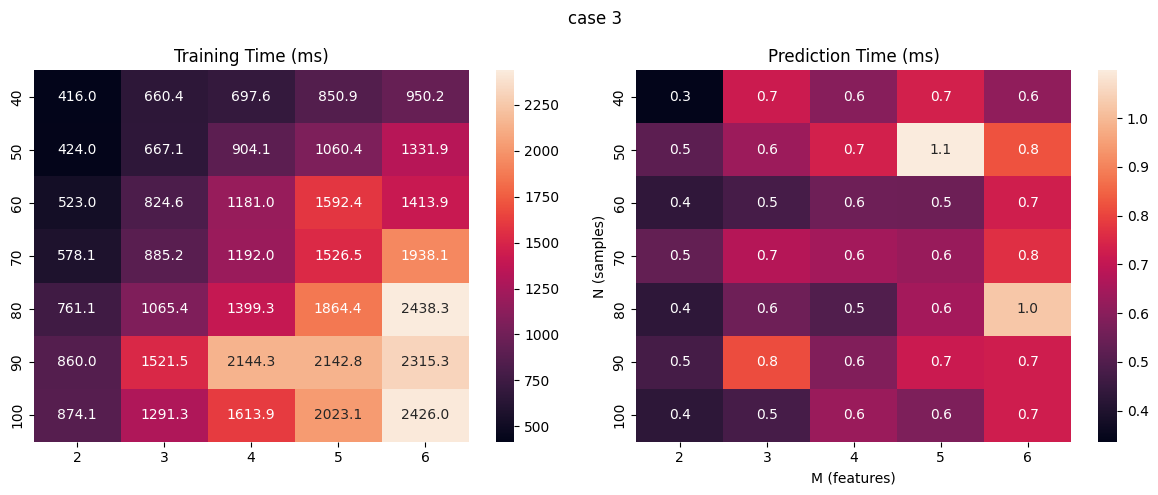

Case 4: Continuous input continuous output
###########################


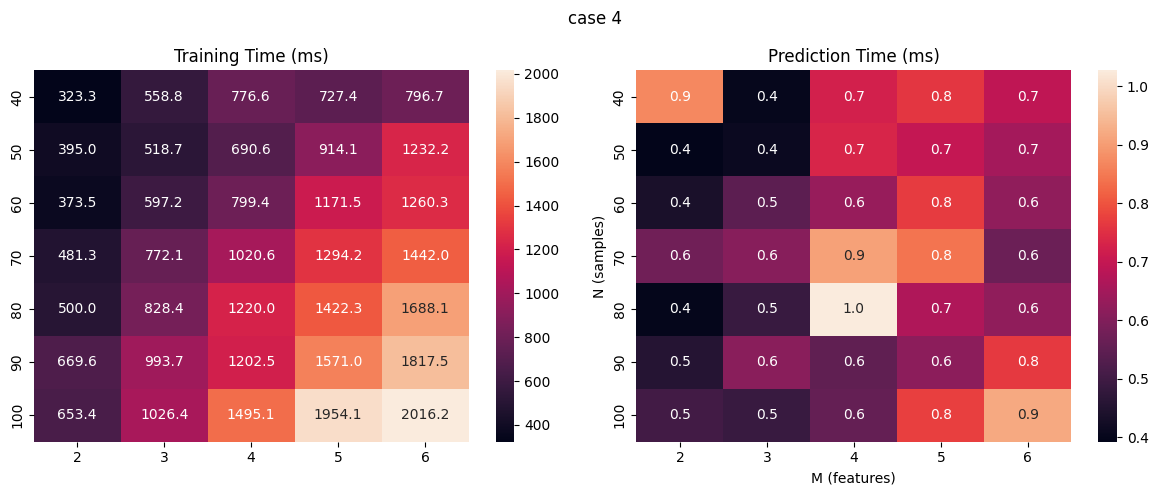

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
import time
import seaborn as sns

np.random.seed(42)
# Number of times to run each experiment to calculate the average values
num_average_time = 100


# Function to create fake data (take inspiration from usage.py)
# ...
# Function to calculate average time (and std) taken by fit() and predict() for different N and P for 4 different cases of DTs
# ...
# Function to plot the results
# ...
# Other functions
# ...
# Run the functions, Learn the DTs and Show the results/plots


# case 1: discrete input  discrete output
# case 2: discrete input  continuous output
# case 3: continuous input  discrete output
# case 4: continuous input continuous output

def get_data_case1(N, M):
    X = np.random.randint(2, size=(N, M))
    y = np.random.randint(2, size=(N))
    X = pd.DataFrame(X)
    y = pd.Series(y)
    return X, y


def get_data_case2(N, M):
    X = np.random.randint(2, size=(N, M))
    y = np.random.rand(N)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    return X, y


def get_data_case3(N, M):
    X = np.random.rand(N, M)
    y = np.random.randint(2, size=(N))
    X = pd.DataFrame(X)
    y = pd.Series(y)
    return X, y


def get_data_case4(N, M):
    X = np.random.rand(N, M)
    y = np.random.rand(N)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    return X, y


def plot_train_prediction_times(train_times, prediction_times, N_values, M_values, title="case"):
    train_matrix = np.array(train_times).reshape(len(N_values), len(M_values))
    pred_matrix = np.array(prediction_times).reshape(
        len(N_values), len(M_values))

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(train_matrix, xticklabels=list(M_values),
                yticklabels=N_values, ax=axes[0], annot=True, fmt=".1f")
    axes[0].set_title("Training Time (ms)")

    sns.heatmap(pred_matrix, xticklabels=list(M_values),
                yticklabels=N_values, ax=axes[1], annot=True, fmt=".1f")
    axes[1].set_title("Prediction Time (ms)")
    axes[1].set_xlabel("M (features)")
    axes[1].set_ylabel("N (samples)")

    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(f"results/{title}.png", dpi=600)
    plt.show()


N_values = [40, 50, 60, 70, 80, 90, 100]
M_values = range(2, 7)

for case in [1, 2, 3, 4]:
    if case == 1:
        print("Case 1: Discrete input discrete output")
    elif case == 2:
        print("Case 2: Discrete input continuous output")
    elif case == 3:
        print("Case 3: Continuous input discrete output")
    elif case == 4:
        print("Case 4: Continuous input continuous output")
    print("###########################")

    train_times = []
    prediction_times = []
    for N in N_values:
        for M in M_values:
            if case == 1:
                X, y = get_data_case1(N, M)
            elif case == 2:
                X, y = get_data_case2(N, M)
            elif case == 3:
                X, y = get_data_case3(N, M)
            elif case == 4:
                X, y = get_data_case4(N, M)

            tree = DecisionTree(criterion="information_gain", max_depth=3)
            start = time.time()
            tree.fit(X, y)
            end = time.time()
            train_times.append((end - start)*1000)

            start = time.time()
            y_hat = tree.predict(X)
            end = time.time()
            prediction_times.append((end - start)*1000)

    plot_train_prediction_times(
        train_times, prediction_times, N_values, M_values, f"case {case}")


From the above heatmap of training and prediction times in terms of M and N, we can say that the empirical results align well with the theoretical time complexity of decision trees. The training complexity, theoretically O(M * N * log(N)), is shown to be dependent on both the number of features (M) and samples (N), as training time consistently increases with both variables across all four cases. A key observation is the dramatic increase in training time for continuous inputs (cases 3 and 4, with times exceeding 2400 ms) compared to discrete inputs (cases 1 and 2, with times mostly under 100 ms). This highlights the computational overhead of sorting continuous features at each node to determine the optimal split. In contrast, the prediction time, theoretically O(log(N)), is extremely fast and relatively stable across all scenarios, staying consistently low (mostly below 1.5 ms). This demonstrates that traversing a pre-built tree is a highly efficient operation, largely unaffected by the number of features or the nature of the input data, thereby confirming the expected performance characteristics of the algorithm.